# Air quality dataset

# XGBclassifier and GradientBoostingClassifer performed better.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
from xgboost import XGBClassifier,XGBRegressor


from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,roc_auc_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,VarianceThreshold,SelectFromModel
import scipy.stats as st
import pylab

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('../dataset/AirQualityUCI.csv')

In [4]:
df.head(4)

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High


In [5]:
df.shape

(9357, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9357 non-null   object 
 1   Time          9357 non-null   object 
 2   CO_GT         9357 non-null   float64
 3   PT08_S1_CO    9357 non-null   int64  
 4   NMHC_GT       9357 non-null   int64  
 5   C6H6_GT       9357 non-null   float64
 6   PT08_S2_NMHC  9357 non-null   int64  
 7   Nox_GT        9357 non-null   int64  
 8   PT08_S3_Nox   9357 non-null   int64  
 9   NO2_GT        9357 non-null   int64  
 10  PT08_S4_NO2   9357 non-null   int64  
 11  PT08_S5_O3    9357 non-null   int64  
 12  T             9357 non-null   float64
 13  RH            9357 non-null   float64
 14  AH            9357 non-null   float64
 15  CO_level      9357 non-null   object 
dtypes: float64(5), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


# EDA 

# 1. Handling missing data

In [8]:
df.Date=pd.to_datetime(df.Date)
df.Time=pd.to_datetime(df.Time)

In [9]:
df['hour']=df['Time'].dt.hour
df['month']=df['Date'].dt.month
df['year']=df.Date.dt.year

In [10]:
df.replace(-200,np.nan,inplace=True)

In [11]:
feat=[]
for i in df.isnull().sum().index:
    if df[i].isnull().sum()>0:
        feat.append(i)
        

In [12]:
feat

['CO_GT',
 'PT08_S1_CO',
 'NMHC_GT',
 'C6H6_GT',
 'PT08_S2_NMHC',
 'Nox_GT',
 'PT08_S3_Nox',
 'NO2_GT',
 'PT08_S4_NO2',
 'PT08_S5_O3',
 'T',
 'RH',
 'AH']

In [13]:
for i in feat:
    df[i]=df[i].fillna(df.groupby(['month','hour'])[i].transform('mean'))
    df[i]=df[i].fillna(df.groupby(['hour'])[i].transform('mean'))
    

In [14]:
df.drop('NMHC_GT',axis=1,inplace=True)

In [15]:
df.isnull().sum()

Date            0
Time            0
CO_GT           0
PT08_S1_CO      0
C6H6_GT         0
PT08_S2_NMHC    0
Nox_GT          0
PT08_S3_Nox     0
NO2_GT          0
PT08_S4_NO2     0
PT08_S5_O3      0
T               0
RH              0
AH              0
CO_level        0
hour            0
month           0
year            0
dtype: int64

# 2. Feature engineering(handling categorical data)

In [16]:
level={'High':4,      
'Very low':1,'Low':2,         
'Moderate':3,    
'Very High':5}

In [17]:
df['CO_level']=df['CO_level'].map(level)

In [18]:
df.drop(columns=['Date','Time','hour','year','month'],axis=1,inplace=True)

In [19]:
df.shape

(9357, 13)

# Visualization

In [20]:
cormat=df.corr()
cormat

,CO_GT,PT08_S1_CO,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
CO_GT,1.000000,0.827945,0.865102,0.854513,0.795366,-0.671124,0.690859,0.557870,0.802284,-0.001192,0.021683,0.001152,0.379920
PT08_S1_CO,0.827945,1.000000,0.883860,0.892751,0.659982,-0.772585,0.614671,0.673825,0.899447,0.044053,0.111647,0.126676,0.394411
C6H6_GT,0.865102,0.883860,1.000000,0.982022,0.660214,-0.735995,0.578113,0.760794,0.864920,0.197972,-0.065297,0.165311,0.330417
PT08_S2_NMHC,0.854513,0.892751,0.982022,1.000000,0.649171,-0.796627,0.609297,0.772411,0.879286,0.240451,-0.094813,0.184465,0.383741
Nox_GT,0.795366,0.659982,0.660214,0.649171,1.000000,-0.613638,0.759968,0.194144,0.727599,-0.258310,0.180001,-0.165350,0.326141
PT08_S3_Nox,-0.671124,-0.772585,-0.735995,-0.796627,-0.613638,1.000000,-0.612906,-0.531067,-0.796423,-0.140425,-0.052290,-0.223935,-0.387483
NO2_GT,0.690859,0.614671,0.578113,0.609297,0.759968,-0.612906,1.000000,0.130791,0.668597,-0.188774,-0.116782,-0.352506,0.448825
PT08_S4_NO2,0.557870,0.673825,0.760794,0.772411,0.194144,-0.531067,0.130791,1.000000,0.580621,0.570195,-0.043183,0.634709,0.145663
PT08_S5_O3,0.802284,0.899447,0.864920,0.879286,0.727599,-0.796423,0.668597,0.580621,1.000000,-0.034314,0.125183,0.061229,0.388199
T,-0.001192,0.044053,0.197972,0.240451,-0.258310,-0.140425,-0.188774,0.570195,-0.034314,1.000000,-0.581552,0.666260,-0.059672


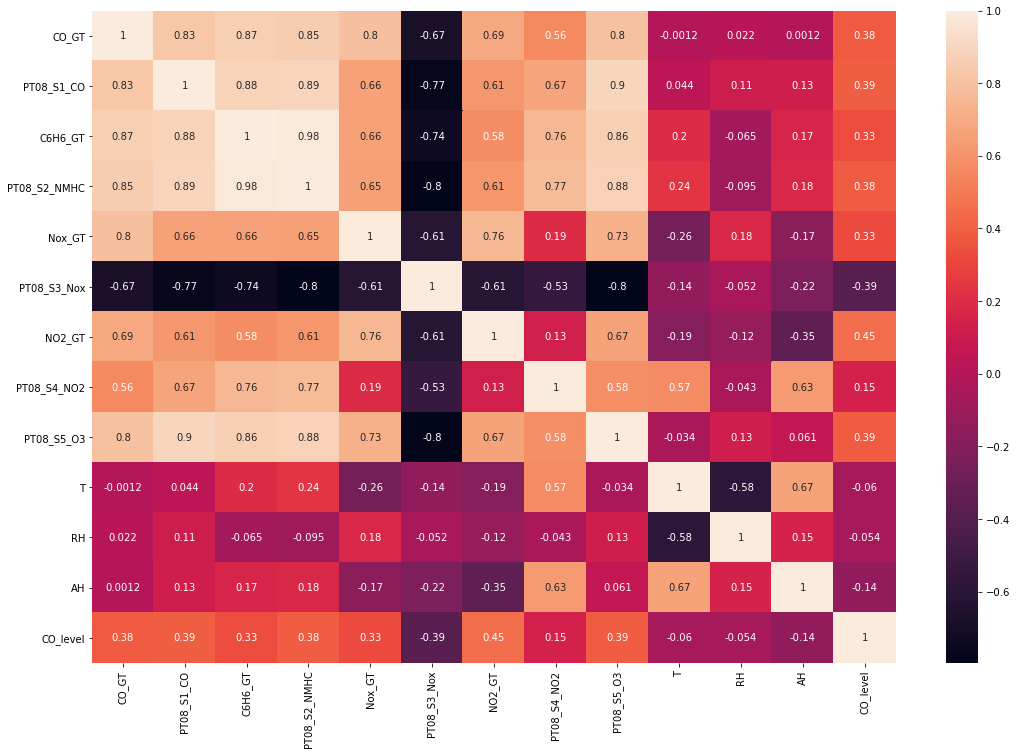

In [21]:
plt.figure(figsize=(18,12))
sns.heatmap(cormat,annot=True,annot_kws={'size':10})

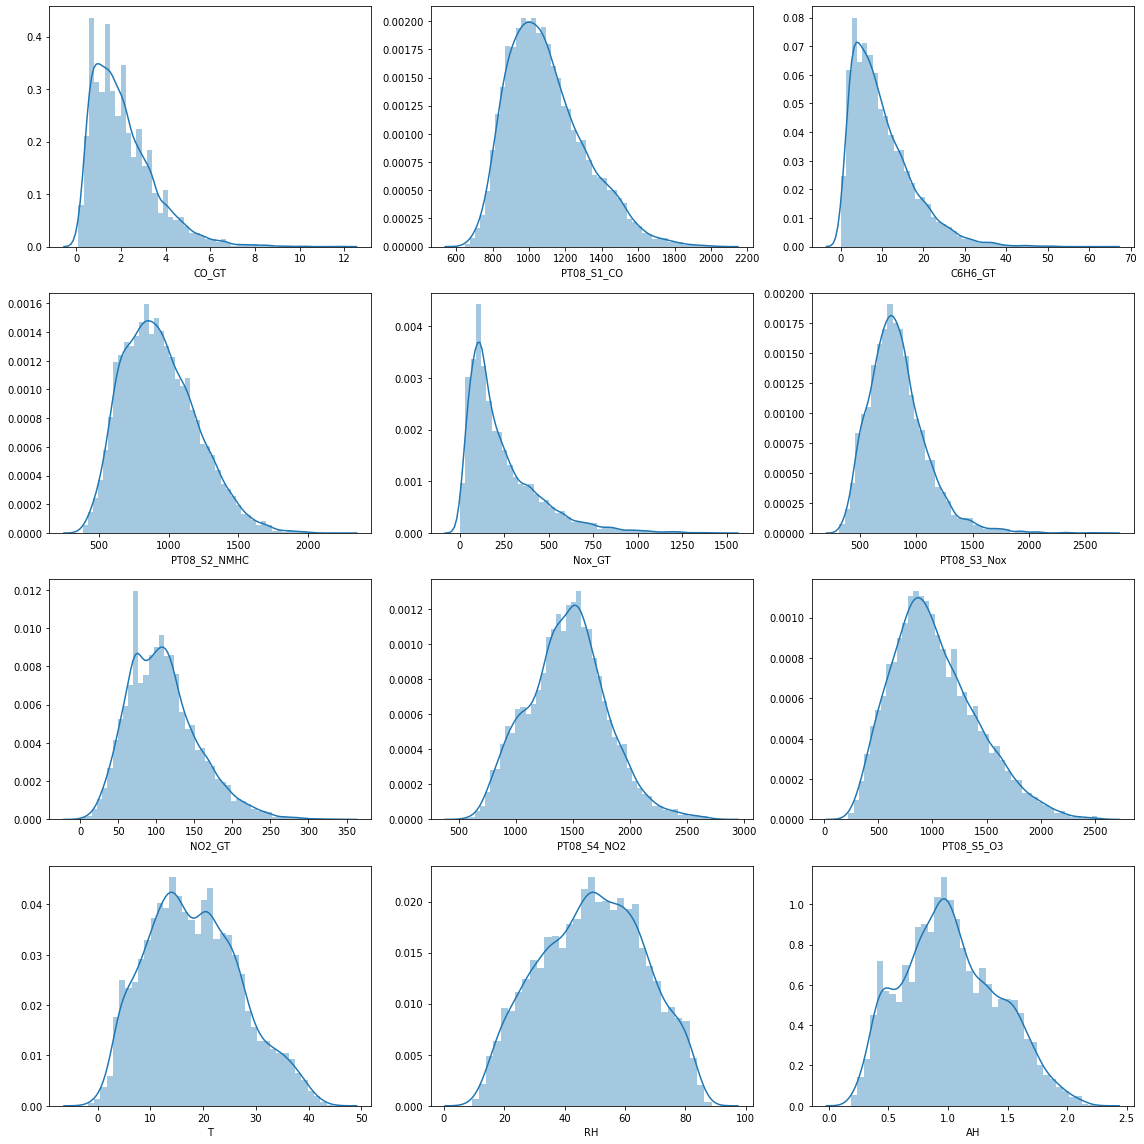

In [22]:
fig,ax=plt.subplots(4,3,figsize=(16,16))
index=0
for i in range(4):
    for j in range(3):
        sns.distplot(df[df.columns[index]],ax=ax[i][j])
        index=index+1
plt.tight_layout()

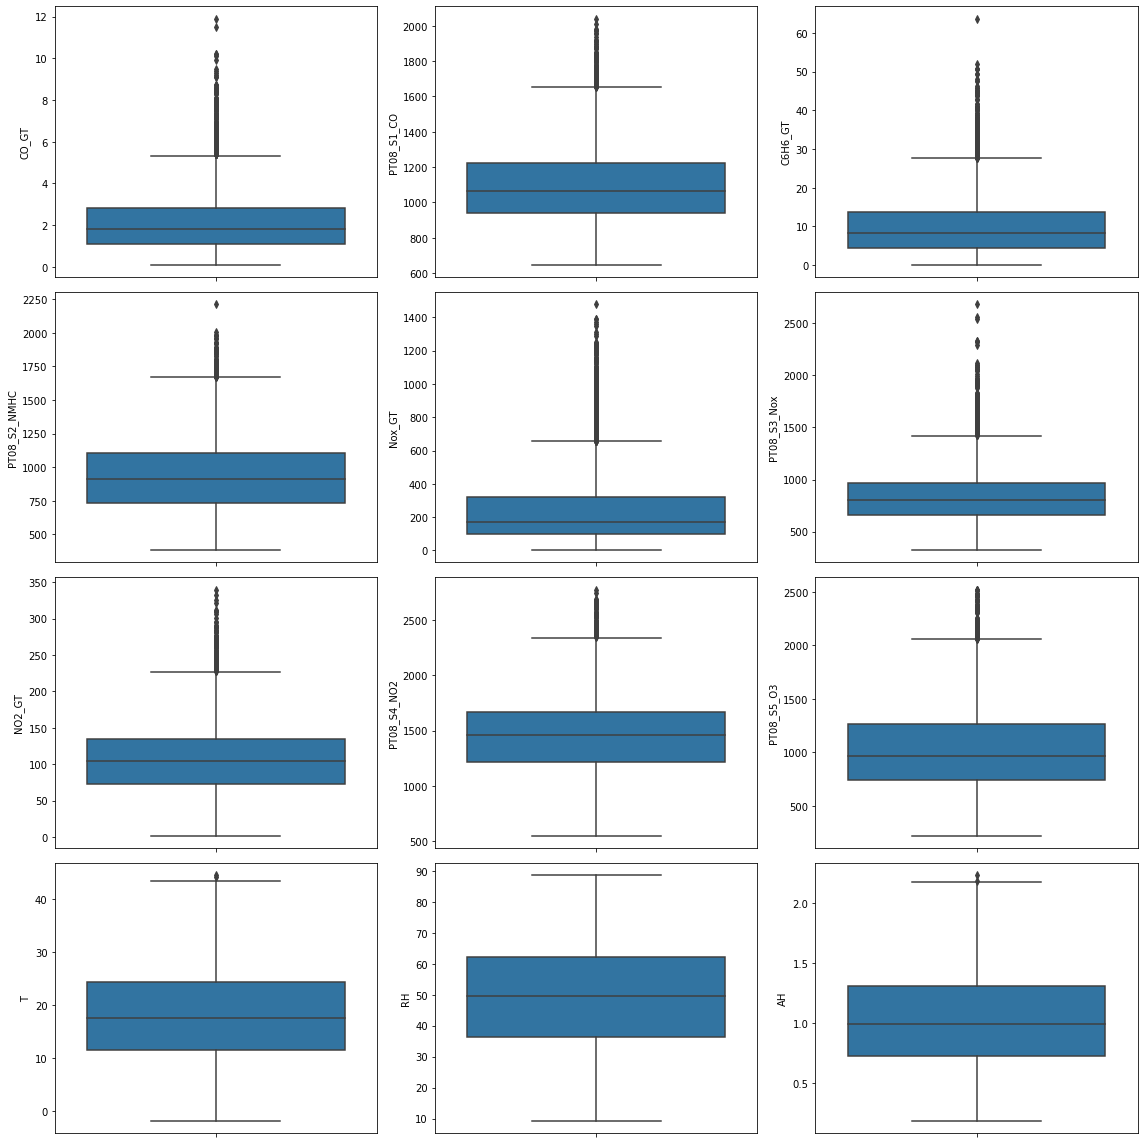

In [23]:
fig,ax=plt.subplots(4,3,figsize=(16,16))
index=0
for i in range(4):
    for j in range(3):
        sns.boxplot(df[df.columns[index]],ax=ax[i][j],orient='vertical')
        index=index+1
plt.tight_layout()

# Splitting data for training and testing

In [24]:
x=df.drop(['CO_level'],axis=1)
y=df['CO_level']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [28]:
x=pd.DataFrame(x)

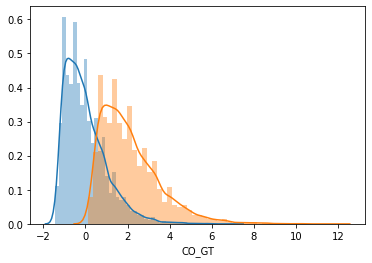

In [29]:
sns.distplot(x[0])
sns.distplot(df['CO_GT'])

# Removing outliers

In [30]:
outliers=[]
for i in x.columns:
    lower=x[i].mean() - 3*x[i].std()
    upper=x[i].mean() + 3*x[i].std()
    
    for j in range(len(x.loc[x[i]>upper,i])):
        outliers.append(x.loc[x[i]>upper,i].index[j])

In [31]:
out=pd.DataFrame(data=x,index=outliers,columns=x.columns)

In [32]:
df.shape

(9357, 13)

In [33]:
df.drop(labels=out.index.unique(),inplace=True,axis=0)

# Splitting data for training and testing

In [34]:
x=df.drop(['CO_level'],axis=1)
y=df['CO_level']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
sc=StandardScaler()
sc.fit(x_train)
x_train1=sc.transform(x_train)
x_test1=sc.transform(x_test)

# Preparing dataframe and storing accuracy of model

In [37]:
acc=[]
model=[]

In [38]:
data=pd.DataFrame(data=[model,acc],index=['Model','Accuracy'])

# XGBClassifier

In [39]:
rf=XGBClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
accuracy=accuracy_score(y_test,pred)

m=XGBClassifier
model.append(m)
acc.append(accuracy)

print(accuracy)
clas=classification_report(y_test,pred)
print(clas)
con=confusion_matrix(y_test,pred)
print(con)

0.9915682967959528
              precision    recall  f1-score   support

           1       1.00      0.96      0.98       326
           2       0.98      1.00      0.99       294
           3       1.00      1.00      1.00        68
           4       0.99      1.00      1.00      1091

    accuracy                           0.99      1779
   macro avg       0.99      0.99      0.99      1779
weighted avg       0.99      0.99      0.99      1779

[[ 312    6    0    8]
 [   0  294    0    0]
 [   0    0   68    0]
 [   1    0    0 1090]]


# RandomForestRegressor

In [40]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
accuracy=r2_score(y_test,pred)
print(accuracy)

m=RandomForestRegressor
model.append(m)
acc.append(accuracy)

0.7904777890972066


# RandomForestClassifier

In [41]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy)

m=RandomForestClassifier
model.append(m)
acc.append(accuracy)

clas=classification_report(y_test,pred)
print(clas)


con=confusion_matrix(y_test,pred)
print(con)

0.9072512647554806
              precision    recall  f1-score   support

           1       0.93      0.54      0.68       326
           2       0.89      0.98      0.93       294
           3       0.94      1.00      0.97        68
           4       0.91      0.99      0.95      1091

    accuracy                           0.91      1779
   macro avg       0.92      0.88      0.88      1779
weighted avg       0.91      0.91      0.90      1779

[[ 175   36    4  111]
 [   6  288    0    0]
 [   0    0   68    0]
 [   8    0    0 1083]]


# Logistic Regression

In [42]:
rf=LogisticRegression(penalty='l1',max_iter=1000,C=1,solver='liblinear')
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy)

m=LogisticRegression
model.append(m)
acc.append(accuracy)

clas=classification_report(y_test,pred)
print(clas)


con=confusion_matrix(y_test,pred)
print(con)

0.7762788083192805
              precision    recall  f1-score   support

           1       0.48      0.12      0.19       326
           2       0.78      0.92      0.84       294
           3       0.00      0.00      0.00        68
           4       0.79      0.98      0.88      1091

    accuracy                           0.78      1779
   macro avg       0.51      0.51      0.48      1779
weighted avg       0.70      0.78      0.71      1779

[[  39   67    0  220]
 [   7  271    0   16]
 [  16   11    0   41]
 [  20    0    0 1071]]


C:\Users\ghild\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

In [43]:
rf=KNeighborsClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy)

m=KNeighborsClassifier
model.append(m)
acc.append(accuracy)

clas=classification_report(y_test,pred)
print(clas)


con=confusion_matrix(y_test,pred)
print(con)

0.7549184935356942
              precision    recall  f1-score   support

           1       0.54      0.42      0.47       326
           2       0.65      0.70      0.68       294
           3       0.25      0.13      0.17        68
           4       0.84      0.91      0.88      1091

    accuracy                           0.75      1779
   macro avg       0.57      0.54      0.55      1779
weighted avg       0.73      0.75      0.74      1779

[[136  68   6 116]
 [ 41 207  10  36]
 [  8  20   9  31]
 [ 67  22  11 991]]


# GradientBoosting Classifier

In [44]:
rf=GradientBoostingClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy)

m=GradientBoostingClassifier
model.append(m)
acc.append(accuracy)

clas=classification_report(y_test,pred)
print(clas)


con=confusion_matrix(y_test,pred)
print(con)

0.9409780775716695
              precision    recall  f1-score   support

           1       0.97      0.70      0.81       326
           2       0.98      1.00      0.99       294
           3       1.00      1.00      1.00        68
           4       0.92      0.99      0.96      1091

    accuracy                           0.94      1779
   macro avg       0.97      0.92      0.94      1779
weighted avg       0.94      0.94      0.94      1779

[[ 227    7    0   92]
 [   0  294    0    0]
 [   0    0   68    0]
 [   6    0    0 1085]]


# Adaboost Classifier

In [45]:
rf=AdaBoostClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy)

m=AdaBoostClassifier
model.append(m)
acc.append(accuracy)

clas=classification_report(y_test,pred)
print(clas)


con=confusion_matrix(y_test,pred)
print(con)

0.3372681281618887
              precision    recall  f1-score   support

           1       0.18      0.73      0.29       326
           2       0.77      1.00      0.87       294
           3       1.00      1.00      1.00        68
           4       0.00      0.00      0.00      1091

    accuracy                           0.34      1779
   macro avg       0.49      0.68      0.54      1779
weighted avg       0.20      0.34      0.23      1779

[[ 238   88    0    0]
 [   0  294    0    0]
 [   0    0   68    0]
 [1091    0    0    0]]


C:\Users\ghild\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVC

In [46]:
rf=SVC()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy)

m=SVC
model.append(m)
acc.append(accuracy)

clas=classification_report(y_test,pred)
print(clas)


con=confusion_matrix(y_test,pred)
print(con)

0.732433951658235
              precision    recall  f1-score   support

           1       0.29      0.01      0.01       326
           2       0.61      0.78      0.69       294
           3       0.00      0.00      0.00        68
           4       0.77      0.98      0.86      1091

    accuracy                           0.73      1779
   macro avg       0.42      0.44      0.39      1779
weighted avg       0.62      0.73      0.64      1779

[[   2   94    0  230]
 [   3  230    0   61]
 [   0   33    0   35]
 [   2   18    0 1071]]


C:\Users\ghild\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
data=pd.DataFrame(data=[model,acc],index=['Model','Accuracy'])

In [48]:
data.T

,Model,Accuracy
0,<class 'xgboost.sklearn.XGBClassifier'>,0.991568
1,<class 'sklearn.ensemble._forest.RandomForestR...,0.790478
2,<class 'sklearn.ensemble._forest.RandomForestC...,0.907251
3,<class 'sklearn.linear_model._logistic.Logisti...,0.776279
4,<class 'sklearn.neighbors._classification.KNei...,0.754918
5,<class 'sklearn.ensemble._gb.GradientBoostingC...,0.940978
6,<class 'sklearn.ensemble._weight_boosting.AdaB...,0.337268
7,<class 'sklearn.svm._classes.SVC'>,0.732434
